# Bounding boxes analysis
We will get a grasp on bounding boxes aspect ratios and area. This two factors will be useful during hyperparameters tuning.

In [2]:
import os
import pandas as pd
import numpy as np

# For this env variable to work, notebook **must** be run from environemnt where env variables were sourced
DATASET_ROOT_DIR = os.environ['DATASET_ROOT_DIR']

bbox_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv'))

bbox_df = bbox_df.assign(Box=bbox_df['BoxesString'].str.split(';')).explode('Box').reset_index(drop=True)
bbox_df = bbox_df[bbox_df['Box'] != 'no_box']
box_to_columns = bbox_df['Box'].str.split(' ')
box_to_columns = list(zip(*box_to_columns))
bbox_df['x_min'], bbox_df['y_min'], bbox_df['x_max'], bbox_df['y_max'] = box_to_columns
bbox_df[['x_max', 'x_min', 'y_min', 'y_max']] = bbox_df[['x_max', 'x_min', 'y_min', 'y_max']].astype(int)
bbox_df

,image_name,BoxesString,domain,Box,x_min,y_min,x_max,y_max
0,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,936 4 977 82,936,4,977,82
1,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,966 0 1023 114,966,0,1023,114
2,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,665 9 795 79,665,9,795,79
3,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,877 0 958 20,877,0,958,20
4,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,742 0 852 132,742,0,852,132
...,...,...,...,...,...,...,...,...
163634,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,235 910 283 937,235,910,283,937
163635,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,961 530 998 572,961,530,998,572
163636,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,980 470 997 522,980,470,997,522
163637,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,787 452 851 488,787,452,851,488


In [3]:
bbox_df['Width'] = bbox_df['x_max'] - bbox_df['x_min']
bbox_df['Height'] = bbox_df['y_max'] - bbox_df['y_min']
bbox_df['AspectRatio'] = pd.Series()
bbox_df['AspectRatio'] = bbox_df['Width'] / bbox_df['Height']
bbox_df['Area'] = bbox_df['Height'] * bbox_df['Width']
bbox_df

/tmp/ipykernel_5979/1402152945.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bbox_df['AspectRatio'] = pd.Series()


,image_name,BoxesString,domain,Box,x_min,y_min,x_max,y_max,Width,Height,AspectRatio,Area
0,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,936 4 977 82,936,4,977,82,41,78,0.525641,3198
1,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,966 0 1023 114,966,0,1023,114,57,114,0.500000,6498
2,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,665 9 795 79,665,9,795,79,130,70,1.857143,9100
3,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,877 0 958 20,877,0,958,20,81,20,4.050000,1620
4,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,742 0 852 132,742,0,852,132,110,132,0.833333,14520
...,...,...,...,...,...,...,...,...,...,...,...,...
163634,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,235 910 283 937,235,910,283,937,48,27,1.777778,1296
163635,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,961 530 998 572,961,530,998,572,37,42,0.880952,1554
163636,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,980 470 997 522,980,470,997,522,17,52,0.326923,884
163637,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,787 452 851 488,787,452,851,488,64,36,1.777778,2304


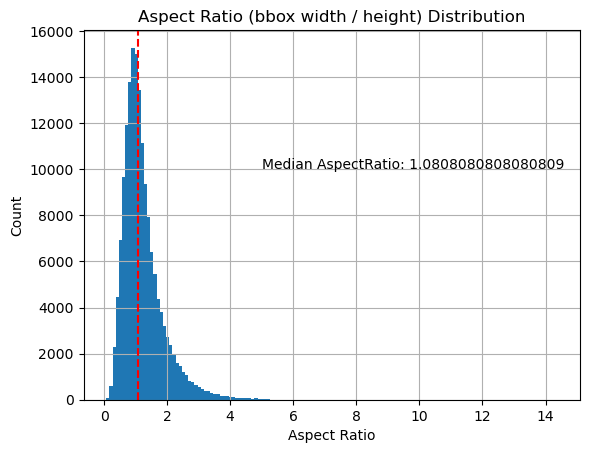

Median AspectRatio: 1.0808080808080809
Area median:  4914.0


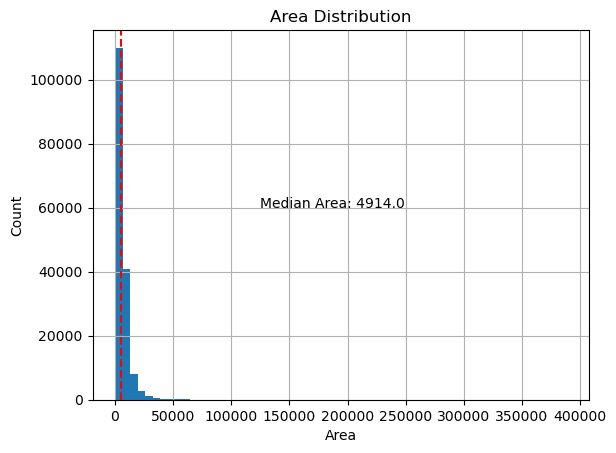

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
bin_width = 0.1
bins_aspect_ratio = np.arange(bbox_df['AspectRatio'].min(), bbox_df['AspectRatio'].max() + bin_width, bin_width)
bbox_df['AspectRatio'].hist(bins=bins_aspect_ratio)
plt.title("Aspect Ratio (bbox width / height) Distribution")
plt.xlabel("Aspect Ratio")
plt.ylabel("Count")
plt.text(5, 10000, "Median AspectRatio: " + str(bbox_df['AspectRatio'].median()))
plt.axvline(x=bbox_df['AspectRatio'].median(), color='red', linestyle='--', label='Median')
plt.show() # what

bin_width = 50
bins_ar = np.arange(bbox_df['Area'].min(), bbox_df['Area'].max() + bin_width, bin_width)
bbox_df['Area'].hist(bins=60)
plt.title("Area Distribution")
plt.xlabel("Area")
plt.ylabel("Count")
plt.text(125000, 60000, "Median Area: " + str(bbox_df['Area'].median()))
plt.axvline(x=bbox_df['Area'].median(), color='red', linestyle='--', label='Median')

print("Median AspectRatio:", bbox_df['AspectRatio'].median())
print("Area median: ", bbox_df['Area'].median())

# Images dimensionality analysis

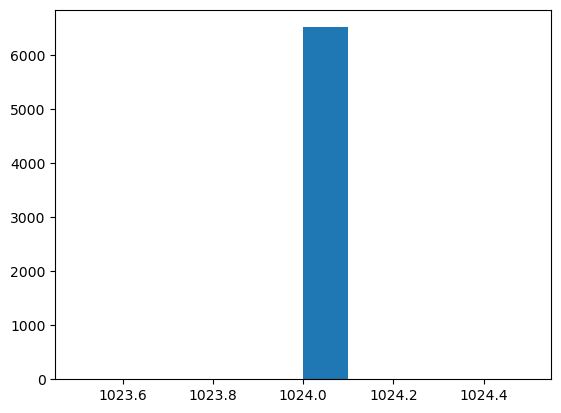

Max values: width - 1024, height - 1024
Min values: width - 1024, height - 1024


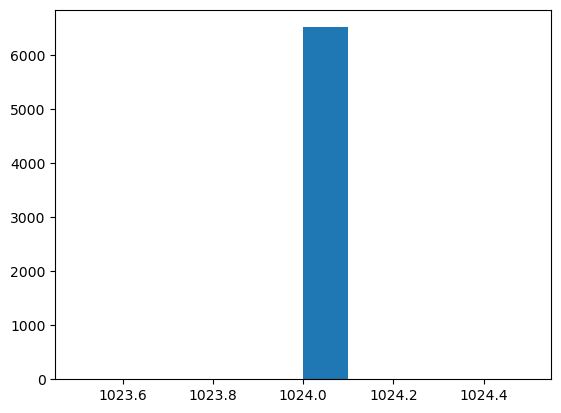

In [5]:
# Create a histogram of image sizes from the dataset
from PIL import Image
imgs_path = '/home/js/gwhd_2021/images'

img_widths = []
img_heights = []

for img_name in os.listdir(imgs_path):
    try:
        img_full_path = Image.open(os.path.join(imgs_path, img_name))
    except:
        print(f"Couldn't open {img_name}, skipping...")
        continue
    img_width, img_height = img_full_path.size
    img_widths.append(img_width)
    img_heights.append(img_height)

plt.hist(img_widths, bins=10)
plt.show() # ?
plt.hist(img_heights, bins=10)
print(f"Max values: width - {np.max(img_widths)}, height - {np.max(img_heights)}")
print(f"Min values: width - {np.min(img_widths)}, height - {np.min(img_heights)}")


# Domain analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Arvalis_11'),
  Text(1, 0, 'Arvalis_3'),
  Text(2, 0, 'ETHZ_1'),
  Text(3, 0, 'Arvalis_2'),
  Text(4, 0, 'NMBU_1'),
  Text(5, 0, 'Rres_1'),
  Text(6, 0, 'Arvalis_4'),
  Text(7, 0, 'ULiège-GxABT_1'),
  Text(8, 0, 'Arvalis_6'),
  Text(9, 0, 'Inrae_1'),
  Text(10, 0, 'Arvalis_1'),
  Text(11, 0, 'Arvalis_5'),
  Text(12, 0, 'Arvalis_7'),
  Text(13, 0, 'Arvalis_12'),
  Text(14, 0, 'NMBU_2'),
  Text(15, 0, 'Arvalis_9'),
  Text(16, 0, 'Arvalis_8'),
  Text(17, 0, 'Arvalis_10')])

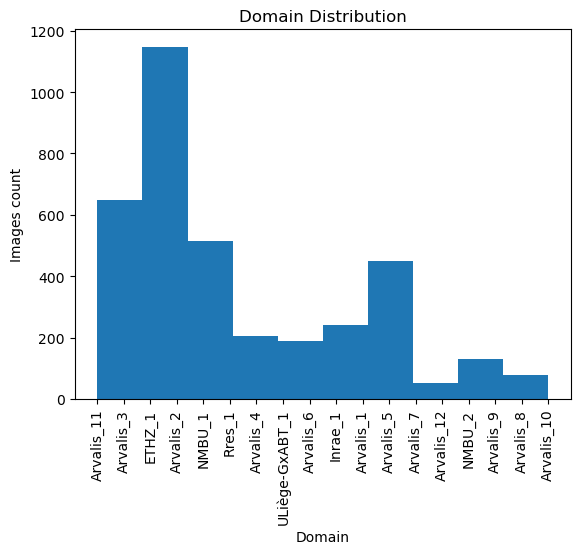

In [6]:
per_image_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv'))
plt.hist(per_image_df['domain'])
plt.title("Domain Distribution")
plt.xlabel("Domain")
plt.ylabel("Images count")
plt.xticks(rotation = 90)

# Development stage analysis

Text(0, 0.5, 'Images count')

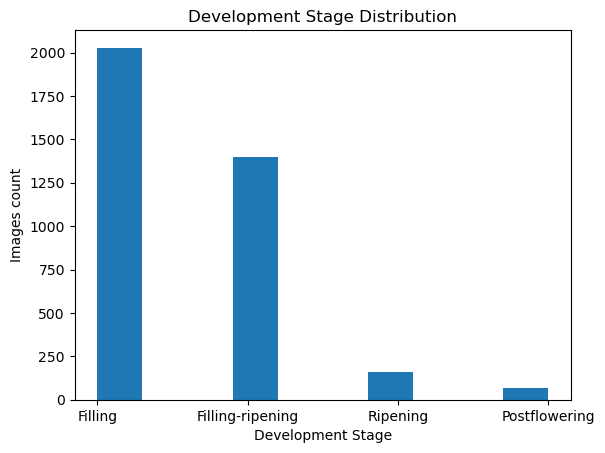

In [7]:
# Dictionary mapping domain to the develpment stage of wheat (for training subset)
# Source: https://spj.science.org/doi/10.34133/2021/9846158
domain_to_devl_stage = {
    'Arvalis_1' : 'Postflowering',
    'Arvalis_2' : 'Filling',
    'Arvalis_3' : 'Filling-ripening',
    'Arvalis_4' : 'Filling',
    'Arvalis_5' : 'Filling',
    'Arvalis_6' : 'Filling-ripening',
    'Arvalis_7' : 'Filling-ripening',
    'Arvalis_8' : 'Filling-ripening',
    'Arvalis_9' : 'Ripening',
    'Arvalis_10' : 'Filling',
    'Arvalis_11' : 'Filling',
    'Arvalis_12' : 'Filling',
    'ETHZ_1' : 'Filling',
    'Inrae_1' : 'Filling-ripening',
    'NMBU_1' : 'Filling',
    'NMBU_2' : 'Ripening',
    'Rres_1' : 'Filling-ripening',
    'ULiège-GxABT_1' : 'Ripening'
}
per_image_df['devel_stage'] = per_image_df['domain'].map(domain_to_devl_stage)
plt.hist(per_image_df['devel_stage'])
plt.title("Development Stage Distribution")
plt.xlabel("Development Stage")
plt.ylabel("Images count")

In [8]:
examples_postflowering = per_image_df.loc[per_image_df['devel_stage'] == 'Postflowering'][:3]['image_name'].values
examples_filling = per_image_df.loc[per_image_df['devel_stage'] == 'Filling'][:3]['image_name'].values
examples_filling_ripening = per_image_df.loc[per_image_df['devel_stage'] == 'Filling-ripening'][:3]['image_name'].values
examples_ripening = per_image_df.loc[per_image_df['devel_stage'] == 'Ripening'][:3]['image_name'].values

In [ ]:
for example in examples_postflowering:
    img = Image.open(os.path.join(imgs_path, example))
    plt.imshow(img)
    plt.show()

In [ ]:
for example in examples_filling:
    img = Image.open(os.path.join(imgs_path, example))
    plt.imshow(img)
    plt.show()

In [ ]:
for example in examples_filling_ripening:
    img = Image.open(os.path.join(imgs_path, example))
    plt.imshow(img)
    plt.show()

In [ ]:
for example in examples_ripening:
    img = Image.open(os.path.join(imgs_path, example))
    plt.imshow(img)
    plt.show()

In [13]:
def get_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [14]:
from matplotlib import patches

def draw_bboxes(img, bboxes: str):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    bboxes = bboxes.split(';')
    bboxes = [bbox.split(' ') for bbox in bboxes]
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = map(int, bbox)
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()

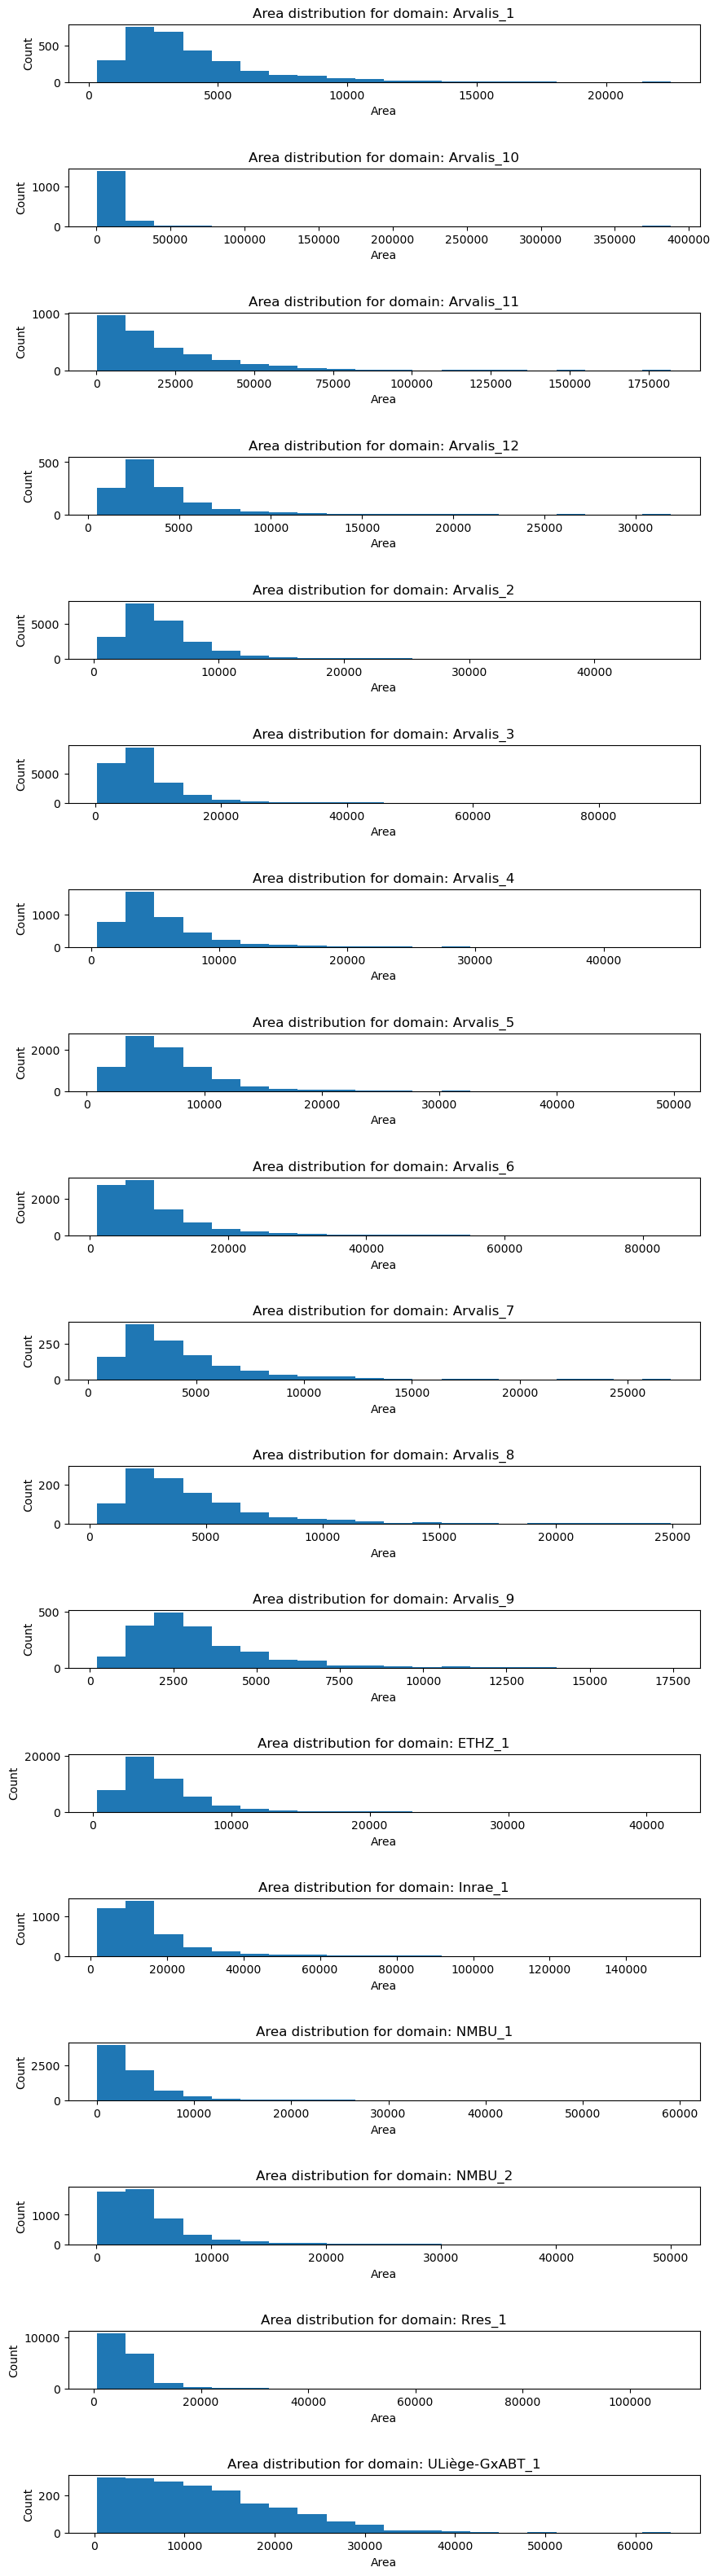

In [15]:
fig, axes = plt.subplots(np.unique(bbox_df['domain']).shape[0], 1, figsize=(10, 40))
for i, domain in enumerate(np.unique(bbox_df['domain'])):
    axes[i].hist(bbox_df.loc[bbox_df['domain'] == domain]['Area'], bins=20)
    axes[i].set_title('Area distribution for domain: ' + domain)
    axes[i].set_xlabel('Area')
    axes[i].set_ylabel('Count')
plt.subplots_adjust(hspace=1.5)

In [ ]:
area_outliers_accumulated = pd.DataFrame(columns=bbox_df.columns)
for domain in np.unique(bbox_df['domain']):
    variance = bbox_df.loc[bbox_df['domain'] == domain]['Area'].var()

    # Calculate outliers
    data = bbox_df.loc[bbox_df['domain'] == domain]
    Q1 = np.percentile(data['Area'], 25)
    Q3 = np.percentile(data['Area'], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['Area'] < lower_bound) | (data['Area'] > upper_bound)]
    area_outliers_accumulated = pd.concat([area_outliers_accumulated, outliers.reset_index()])
    area_outliers_accumulated.loc[:, ['image_name', 'Box', 'domain']].to_csv('area_outliers.csv', index=False)
    # Plot some outliers
    fig, ax = plt.subplots(2, figsize=(10, 10))
    outliers = outliers.sort_values(by='Area', ascending=False)
    if outliers.shape[0] == 0:
        print(f"No outliers for domain {domain}")
        continue

    # Max area outlier
    max_area_outlier = outliers.iloc[0]
    img = Image.open(os.path.join(imgs_path, max_area_outlier['image_name']))
    ax[0].imshow(img)
    x_min, y_min, x_max, y_max = max_area_outlier['x_min'], max_area_outlier['y_min'], max_area_outlier['x_max'], max_area_outlier['y_max']
    ax[0].annotate(f"Area: {max_area_outlier['Area']}", (x_min, y_min), color='white', weight='bold',
             fontsize=6, ha='center', va='center')
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)

    # Min area outlier
    min_area_outlier = outliers.iloc[-1]
    img = Image.open(os.path.join(imgs_path, min_area_outlier['image_name']))
    ax[1].imshow(img)
    x_min, y_min, x_max, y_max = min_area_outlier['x_min'], min_area_outlier['y_min'], min_area_outlier['x_max'], min_area_outlier['y_max']
    ax[1].annotate(f"Area: {min_area_outlier['Area']}", (x_min, y_min), color='white', weight='bold',
             fontsize=6, ha='center', va='center')
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
    ax[1].add_patch(rect)
    print(f"Area variance for domain {domain}: {variance}")
    print(f"Outliers n = {outliers.shape[0]} for domain {domain}")
    print(f"Outlier image name: {outliers.iloc[0]['image_name']}")
    print(f"Min area: {outliers['Area'].min()}, max area: {outliers['Area'].max()}")
    plt.show()

area_outliers_accumulated

In [ ]:
aspect_ratio_outliers_accumulated = pd.DataFrame(columns=bbox_df.columns)
for domain in np.unique(bbox_df['domain']):
    variance = bbox_df.loc[bbox_df['domain'] == domain]['AspectRatio'].var()

    # Calculate outliers
    data = bbox_df.loc[bbox_df['domain'] == domain]
    Q1 = np.percentile(data['AspectRatio'], 25)
    Q3 = np.percentile(data['AspectRatio'], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['AspectRatio'] < lower_bound) | (data['AspectRatio'] > upper_bound)]
    aspect_ratio_outliers_accumulated = pd.concat([aspect_ratio_outliers_accumulated, outliers.reset_index()])
    aspect_ratio_outliers_accumulated.loc[:, ['image_name', 'Box', 'domain']].to_csv('aspect_ratio_outliers.csv', index=False)
